In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Análisis del dataset de superMercado

In [50]:
#Creacion del dataframe
df = pd.read_csv('superMercado.csv')
df.columns = df.columns.str.strip()
df.head()

,producto,categoria,subcategoria,precio,cantidad_vendida,fecha_venta,hora_venta,cliente,direccion_entrega,metodo_pago,card
0,Organic Blueberries,Food - Fruits,Berries,782.86,825.0,11/6/2022,1:18 AM,Celie Sitlington,8 Mayfield Center,Efectivo,5237925327087542
1,Cranberry Orange Oatmeal,Food - Breakfast,Instant Breakfast,349.69,102.0,7/26/2022,12:49 AM,Consuelo Setchell,0472 Hayes Alley,Efectivo,67613382618219109
2,Organic Coconut Flour,Food - Baking,Baking Ingredients,503.52,59.0,9/28/2022,12:00 PM,Norby Aldwich,871 Melody Street,Efectivo,5602232782968473
3,Fishing Tackle Box,Outdoor,Fishing Equipment,423.12,873.0,6/21/2022,4:12 PM,Kingsly Silver,744 Surrey Court,Tarjeta de crédito,633110546464181301
4,Kids' Trampoline,Toys,Outdoor Activity Toys,586.70,288.0,5/3/2022,1:21 AM,Trip Teague,592 Hanover Avenue,Transferencia bancaria,3534316273317288


In [51]:
#Comprobar tipos de datos
df.dtypes

producto              object
categoria             object
subcategoria          object
precio               float64
cantidad_vendida     float64
fecha_venta           object
hora_venta            object
cliente               object
direccion_entrega     object
metodo_pago           object
card                   int64
dtype: object

Cambiar las fechas y hora a formato datetime.

In [52]:
#Cambio de formato de las fechas
df_copy = df.copy()
df_copy['fecha_venta'] = pd.to_datetime(df_copy['fecha_venta'], errors='coerce')
df_copy['hora_venta_ts'] = pd.to_datetime(df_copy['hora_venta'], format='%I:%M %p', errors='coerce')
df_copy

,producto,categoria,subcategoria,precio,cantidad_vendida,fecha_venta,hora_venta,cliente,direccion_entrega,metodo_pago,card,hora_venta_ts
0,Organic Blueberries,Food - Fruits,Berries,782.86,825.0,2022-11-06,1:18 AM,Celie Sitlington,8 Mayfield Center,Efectivo,5237925327087542,1900-01-01 01:18:00
1,Cranberry Orange Oatmeal,Food - Breakfast,Instant Breakfast,349.69,102.0,2022-07-26,12:49 AM,Consuelo Setchell,0472 Hayes Alley,Efectivo,67613382618219109,1900-01-01 00:49:00
2,Organic Coconut Flour,Food - Baking,Baking Ingredients,503.52,59.0,2022-09-28,12:00 PM,Norby Aldwich,871 Melody Street,Efectivo,5602232782968473,1900-01-01 12:00:00
3,Fishing Tackle Box,Outdoor,Fishing Equipment,423.12,873.0,2022-06-21,4:12 PM,Kingsly Silver,744 Surrey Court,Tarjeta de crédito,633110546464181301,1900-01-01 16:12:00
4,Kids' Trampoline,Toys,Outdoor Activity Toys,586.70,288.0,2022-05-03,1:21 AM,Trip Teague,592 Hanover Avenue,Transferencia bancaria,3534316273317288,1900-01-01 01:21:00
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Buffalo Style Cauliflower Bites,Food - Frozen Vegetables,Frozen Veggie Snacks,923.79,979.0,2022-03-10,6:13 PM,Emmye Cowcha,60 Schmedeman Circle,Tarjeta de crédito,5018232227861174,1900-01-01 18:13:00
996,Reusable Snack Bags,Kitchen,NaN,656.45,180.0,2022-07-14,10:13 AM,Quintana McGrail,73181 Northport Avenue,Efectivo,3578364866386598,1900-01-01 10:13:00
997,Garden Vegetable Chips,Food - Snacks,Vegetable Snacks,218.17,532.0,2022-02-03,12:14 AM,Yelena Whear,84846 Marquette Street,Efectivo,3540748584004381,1900-01-01 00:14:00
998,Whole Wheat Bread,Food - Bakery,NaN,46.36,613.0,2022-06-17,9:10 PM,Caren Vasilyev,298 Trailsway Junction,Tarjeta de crédito,564182347885991802,1900-01-01 21:10:00


Como se puede comprobar la cantidad de datos son 1000, lo que para un entrenamiento adecuado es demasiado bajo.

In [53]:
# Resumen rápido
display(df_copy.head())
display(df_copy.info())
display(df_copy[['precio','cantidad_vendida']].describe())

,producto,categoria,subcategoria,precio,cantidad_vendida,fecha_venta,hora_venta,cliente,direccion_entrega,metodo_pago,card,hora_venta_ts
0,Organic Blueberries,Food - Fruits,Berries,782.86,825.0,2022-11-06,1:18 AM,Celie Sitlington,8 Mayfield Center,Efectivo,5237925327087542,1900-01-01 01:18:00
1,Cranberry Orange Oatmeal,Food - Breakfast,Instant Breakfast,349.69,102.0,2022-07-26,12:49 AM,Consuelo Setchell,0472 Hayes Alley,Efectivo,67613382618219109,1900-01-01 00:49:00
2,Organic Coconut Flour,Food - Baking,Baking Ingredients,503.52,59.0,2022-09-28,12:00 PM,Norby Aldwich,871 Melody Street,Efectivo,5602232782968473,1900-01-01 12:00:00
3,Fishing Tackle Box,Outdoor,Fishing Equipment,423.12,873.0,2022-06-21,4:12 PM,Kingsly Silver,744 Surrey Court,Tarjeta de crédito,633110546464181301,1900-01-01 16:12:00
4,Kids' Trampoline,Toys,Outdoor Activity Toys,586.70,288.0,2022-05-03,1:21 AM,Trip Teague,592 Hanover Avenue,Transferencia bancaria,3534316273317288,1900-01-01 01:21:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   producto           1000 non-null   object        
 1   categoria          879 non-null    object        
 2   subcategoria       847 non-null    object        
 3   precio             1000 non-null   float64       
 4   cantidad_vendida   944 non-null    float64       
 5   fecha_venta        1000 non-null   datetime64[ns]
 6   hora_venta         1000 non-null   object        
 7   cliente            967 non-null    object        
 8   direccion_entrega  1000 non-null   object        
 9   metodo_pago        1000 non-null   object        
 10  card               1000 non-null   int64         
 11  hora_venta_ts      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


None

,precio,cantidad_vendida
count,1000.000000,944.000000
mean,492.982400,478.043432
std,292.708366,295.698216
min,1.210000,1.000000
25%,238.757500,210.250000
50%,491.490000,462.500000
75%,751.767500,744.000000
max,999.520000,1000.000000


De esta información que se puede deducir:
- Muchas de las columnas son object, es decir, son categoricas.
- El dataset presenta muchos elementos nulos:
    - La columna 'categoria' presenta 121 nulos de los 1000.
    - La columna 'subcategoria' presenta 153 nulos de los 1000.
    - La columna 'cantidad_vendida' presenta 56 nulos de los 1000.
    - La columna 'cliente' presenta 33 nulos de los 1000.

    Esto implica que hay que realizar una limpieza de los datos, pero se tendrá que toma una decision de si etiquetarlo o eliminar las filas, pero como son pocos datos eliminar casi 200 filas podría afectar mucho al entrenamiento porque se reduciria significativamente la cantidad de datos.
- También hay que tener en cuenta que la cantidad vendida al presentar valores nulos, abra que tratarlo adecuadamente.
- El precio y la cantidad vendida tienen percentiles muy similares, esto puede ser inusual por lo que puede haber algún error.



Como la mayoria de datos son categóricos no tiene sentido comprobar sus distribuciones, salvo para el caso del precio y la cantiadd vendida. Teniendo en cuenta que hay valores en cantidad vendida que son nulos (por lo que los voy a eliminar) 

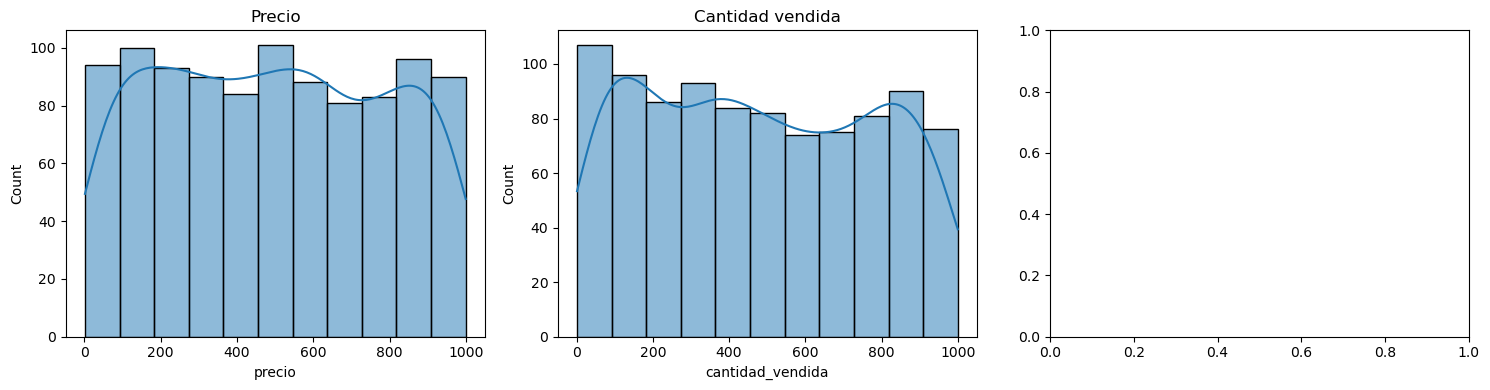

In [54]:
# Distribuciones: histogramas
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.histplot(df_copy['precio'].dropna(), kde=True, ax=ax[0]).set_title('Precio')
sns.histplot(df_copy['cantidad_vendida'].dropna(), kde=True, ax=ax[1]).set_title('Cantidad vendida')
plt.tight_layout()

En ambos casos se puede observar que la distribución es relativamente plana, tienen gran dispersión y muchas categorias de valores.

Otro análisis que puede ser combeniente es como estan distribuidas las opciones dentro de los elementos categoricos, para ver si hay mucha diferencia entre la frecuencia de las categorias.

{'producto': 765, 'categoria': 110, 'subcategoria': 369, 'cliente': 967, 'metodo_pago': 3}


C:\Users\Ccp0897\AppData\Local\Temp\ipykernel_20504\1947016397.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(uniq.values()), y=list(uniq.keys()), palette='viridis')


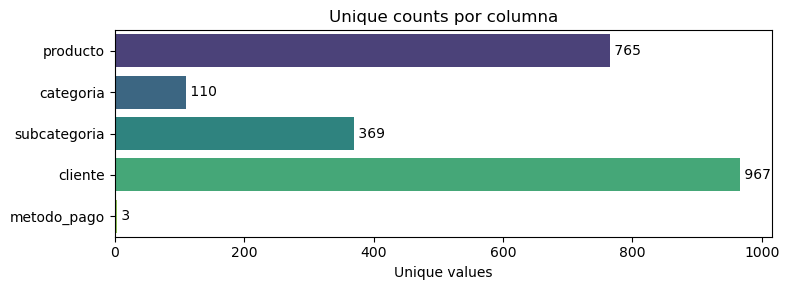

In [55]:
cols = ['producto','categoria','subcategoria','cliente','metodo_pago']

#Resumen de unique counts
uniq = {c: int(df[c].nunique(dropna=True)) for c in cols}
print(uniq)
plt.figure(figsize=(8,3))
sns.barplot(x=list(uniq.values()), y=list(uniq.keys()), palette='viridis')
plt.title('Unique counts por columna')
for i,(k,v) in enumerate(uniq.items()):
    plt.text(v, i, f' {v}', va='center')
plt.xlabel('Unique values')
plt.tight_layout()
plt.show()

Aqui se puede observar que cantidad de valores unicos tiene cada característica, viendo que no tiene sentido codificarlos puesto que son muchos, como mucho tendría sentido codificar el método de pago.

producto 765


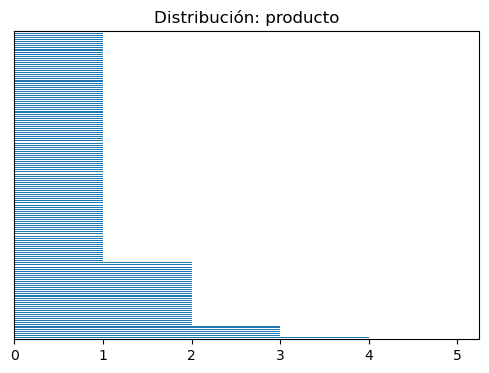

categoria 110


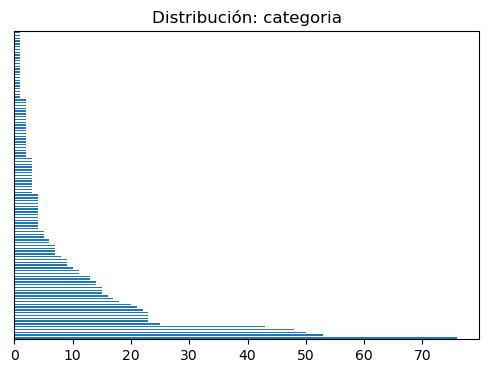

subcategoria 369


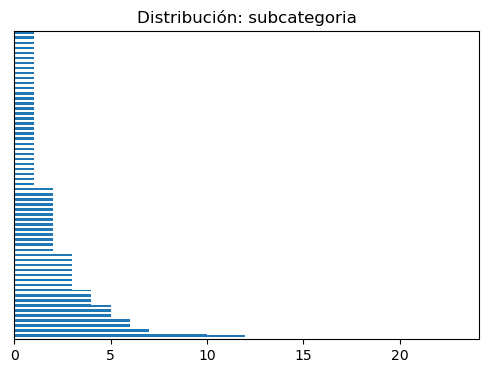

metodo_pago 3


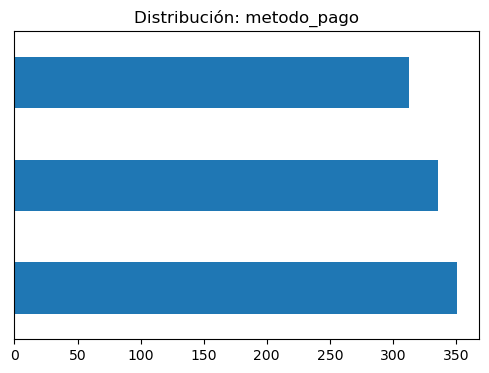

In [56]:
# Frecuencias categóricas
for col in ['producto','categoria','subcategoria','metodo_pago']:
    print(col, df_copy[col].nunique())
    df_copy[col].value_counts(dropna=True).plot(kind='barh', figsize=(6,4)).get_yaxis().set_visible(False)
    plt.title(f'Distribución: {col}')
    plt.show()

De las diferentes características se puede deducir (excluyendo los valores de nan):

- En cuanto al método de pago tiene una distribución casi perfecta, no destaca mucho uno sobre otro.
- En cuanto a las categorias, existen categorias con muchas apariciones.
- Y tanto para producto como subcategoria la cardinalidad es muy alta por lo que cada una tiene muy poca aparición.

Ahora voy a comprobar si el precio y la cantidad estan correlacionadas

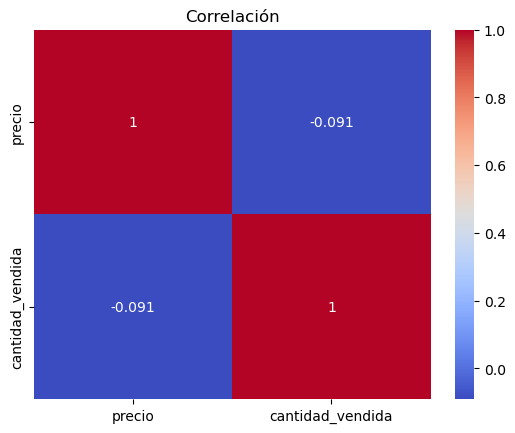

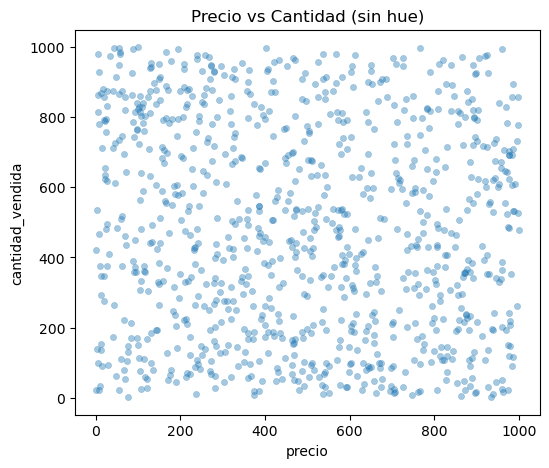

In [57]:
corr = df_copy[['precio','cantidad_vendida']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación')
plt.show()
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_copy, x='precio', y='cantidad_vendida', s=20, alpha=0.4, edgecolor=None)
plt.title('Precio vs Cantidad (sin hue)')
plt.show()


Como se puede observar no tienen correlación alguna. Para una mejor compresión si se observa la distribucíon del precio y la cantidad donde se puede ver que la nube de puntos esta muy dispersa.

Comprobar la existencia de outliers

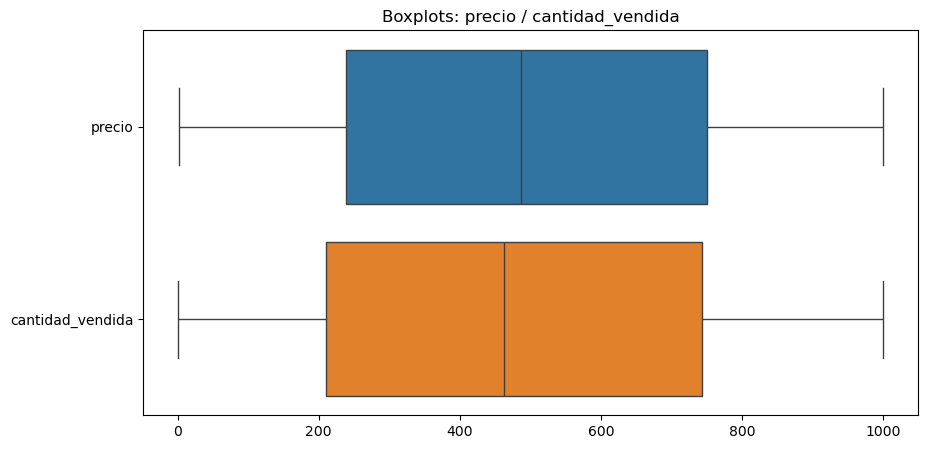

In [58]:
#Boxplots básicos lado a lado
plt.figure(figsize=(10,5))
sns.boxplot(data=df_copy[['precio','cantidad_vendida']].dropna(), orient='h')
plt.title('Boxplots: precio / cantidad_vendida')
plt.show()

No parece que haya muchos outliers